In [ ]:
conda install xlrd

Channels:
 - defaults
Platform: osx-64
Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
import re

shark_data = pd.read_excel('https://www.sharkattackfile.net/spreadsheets/GSAF5.xls')

In [ ]:
shark_data.head()

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,15 Mar 2024,2024.0,Unprovoked,AUSTRALIA,Queensland,Bargara Beach,Swimming,Brooklyn Sauer,F,13,...,Tiger shark,"Yahoo News, 3/15/2024",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,04 Mar 2024,2024.0,Unprovoked,USA,Hawaii,"Old Man's, Waikiki",Surfing,Matthew White,M,NaN,...,Tiger shark 8',"Surfer, 3/6/2024F",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,02 Mar-2024,2024.0,Unprovoked,USA,Hawaii,"Rainbows, Oahu",Swimming,NaN,F,11,...,3' to 4' shark,"Hawaii News Now, 3/4/2024",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,25 Feb-2024,2024.0,Unprovoked,AUSTRALIA,Western Australia,"Sandlnd Island, Jurian Bay",NaN,female,F,46,...,Tiger shark,"WA Today, 2/26/2024",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,14 Feb-2024,2024.0,Unprovoked,INDIA,Maharashtra,"Vaitarna River, Palghar District",Fishing,Vicky Suresh Govari,M,32,...,"Bull shark, 7'","Times of India, 2/14/2024",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
shark_data.shape

(6969, 23)

In [ ]:
shark_data.drop(columns=["Year","Country", "Date","State","Location","Name","Age","Sex","Unnamed: 21","Unnamed: 22", "Unnamed: 11", "href", "href formula", "Source", "Case Number", "Case Number.1", "original order","pdf", "Time"], inplace = True)

In [ ]:
shark_data.dtypes #Change date from object to datetime

Type        object
Activity    object
Injury      object
Species     object
dtype: object

In [ ]:
shark_data.rename(columns= lambda x: x.lower(), inplace=True)
shark_data.rename(columns= lambda x: x.replace(" ", "_"), inplace=True)
shark_data.rename(columns={'species_':'species'}, inplace=True)
shark_data.head()

,type,activity,injury,species
0,Unprovoked,Swimming,"Minor injuries to back, abdomen and legs",Tiger shark
1,Unprovoked,Surfing,"No injury, shark bit surfboard",Tiger shark 8'
2,Unprovoked,Swimming,Lacerations to left foot,3' to 4' shark
3,Unprovoked,NaN,Leg bitten,Tiger shark
4,Unprovoked,Fishing,Calf of lower left leg injured,"Bull shark, 7'"


In [ ]:
shark_data['species'].value_counts()

species
White shark                                                                                                                      194
Shark involvement prior to death was not confirmed                                                                               105
Invalid                                                                                                                          102
Shark involvement not confirmed                                                                                                   92
Tiger shark                                                                                                                       89
                                                                                                                                ... 
1.2 m to 1.8 m [4' to 6'] shark                                                                                                    1
Grey nurse shark, 3 m female                                 

In [ ]:
shark_data['species'] = shark_data['species'].replace('NaN', 'not confirmed')
shark_data['species'].value_counts()

species
White shark                                                                                                                      194
Shark involvement prior to death was not confirmed                                                                               105
Invalid                                                                                                                          102
Shark involvement not confirmed                                                                                                   92
Tiger shark                                                                                                                       89
                                                                                                                                ... 
1.2 m to 1.8 m [4' to 6'] shark                                                                                                    1
Grey nurse shark, 3 m female                                 

In [ ]:
# Regular expression pattern to match the whole word "white"
pattern = r"\b(white)\b"

# shark_data["Species "] = shark_data['Species '].fillna('N/A')

shark_data["species"] = shark_data["species"].astype(str)
shark_data["species"] = shark_data["species"].apply(lambda specie : str(specie).strip())

# # Filter rows containing the word "white shark" (case-insensitive, if required)
white_shark = shark_data[shark_data['species'].str.contains(pattern, case=False, regex=True)]

/var/folders/jg/z9vz0kpj1t56r_y5t2ghwzxc0000gn/T/ipykernel_39877/1123134713.py:10: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  white_shark = shark_data[shark_data['species'].str.contains(pattern, case=False, regex=True)]


In [ ]:
white_shark["species"] = white_shark['species'].str.extract(pattern, flags=re.IGNORECASE)
white_shark["species"] = white_shark['species'].str.title()
white_shark["species"].value_counts()

/var/folders/jg/z9vz0kpj1t56r_y5t2ghwzxc0000gn/T/ipykernel_39877/88184237.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  white_shark["species"] = white_shark['species'].str.extract(pattern, flags=re.IGNORECASE)
/var/folders/jg/z9vz0kpj1t56r_y5t2ghwzxc0000gn/T/ipykernel_39877/88184237.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  white_shark["species"] = white_shark['species'].str.title()


species
White    702
Name: count, dtype: int64

In [ ]:
# Regular expression pattern to match the whole word "tiger"
pattern = r"\b(tiger)\b"

# shark_data["Species "] = shark_data['Species '].fillna('N/A')

shark_data["species"] = shark_data["species"].astype(str)
shark_data["species"] = shark_data["species"].apply(lambda specie : str(specie).strip())

# # Filter rows containing the word "white shark" (case-insensitive, if required)
tiger_shark = shark_data[shark_data['species'].str.contains(pattern, case=False, regex=True)]

/var/folders/jg/z9vz0kpj1t56r_y5t2ghwzxc0000gn/T/ipykernel_39877/1634748478.py:10: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  tiger_shark = shark_data[shark_data['species'].str.contains(pattern, case=False, regex=True)]


In [ ]:
tiger_shark["species"] = tiger_shark['species'].str.extract(pattern, flags=re.IGNORECASE)
tiger_shark["species"] = tiger_shark['species'].str.title()
tiger_shark["species"].value_counts()

/var/folders/jg/z9vz0kpj1t56r_y5t2ghwzxc0000gn/T/ipykernel_39877/3346320502.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tiger_shark["species"] = tiger_shark['species'].str.extract(pattern, flags=re.IGNORECASE)
/var/folders/jg/z9vz0kpj1t56r_y5t2ghwzxc0000gn/T/ipykernel_39877/3346320502.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tiger_shark["species"] = tiger_shark['species'].str.title()


species
Tiger    307
Name: count, dtype: int64

In [ ]:
# Regular expression pattern to match the whole word "bull"
pattern = r"\b(bull)\b"

# shark_data["Species "] = shark_data['Species '].fillna('N/A')

shark_data["species"] = shark_data["species"].astype(str)
shark_data["species"] = shark_data["species"].apply(lambda specie : str(specie).strip())

# # Filter rows containing the word "white shark" (case-insensitive, if required)
bull_shark = shark_data[shark_data['species'].str.contains(pattern, case=False, regex=True)]

/var/folders/jg/z9vz0kpj1t56r_y5t2ghwzxc0000gn/T/ipykernel_39877/1880354264.py:10: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  bull_shark = shark_data[shark_data['species'].str.contains(pattern, case=False, regex=True)]


In [ ]:
bull_shark["species"] = bull_shark['species'].str.extract(pattern, flags=re.IGNORECASE)
bull_shark["species"] = bull_shark['species'].str.title()
bull_shark["species"].value_counts()

/var/folders/jg/z9vz0kpj1t56r_y5t2ghwzxc0000gn/T/ipykernel_39877/149980144.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bull_shark["species"] = bull_shark['species'].str.extract(pattern, flags=re.IGNORECASE)
/var/folders/jg/z9vz0kpj1t56r_y5t2ghwzxc0000gn/T/ipykernel_39877/149980144.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bull_shark["species"] = bull_shark['species'].str.title()


species
Bull    225
Name: count, dtype: int64

In [ ]:
# Regular expression pattern to match the whole word "not_confirmed"
pattern = r"\b(not confirmed)\b"

# shark_data["Species "] = shark_data['Species '].fillna('N/A')

shark_data["species"] = shark_data["species"].astype(str)
shark_data["species"] = shark_data["species"].apply(lambda specie : str(specie).strip())

# # Filter rows containing the word "white shark" (case-insensitive, if required)
no_shark = shark_data[shark_data['species'].str.contains(pattern, case=False, regex=True)]

/var/folders/jg/z9vz0kpj1t56r_y5t2ghwzxc0000gn/T/ipykernel_39877/1894567263.py:10: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  no_shark = shark_data[shark_data['species'].str.contains(pattern, case=False, regex=True)]


In [ ]:
no_shark["species"] = no_shark['species'].str.extract(pattern, flags=re.IGNORECASE)
no_shark["species"] = no_shark['species'].str.title()
no_shark["species"].value_counts()

/var/folders/jg/z9vz0kpj1t56r_y5t2ghwzxc0000gn/T/ipykernel_39877/1084447367.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_shark["species"] = no_shark['species'].str.extract(pattern, flags=re.IGNORECASE)
/var/folders/jg/z9vz0kpj1t56r_y5t2ghwzxc0000gn/T/ipykernel_39877/1084447367.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_shark["species"] = no_shark['species'].str.title()


species
Not Confirmed    230
Name: count, dtype: int64

In [ ]:
# Regular expression pattern to match the whole word "mako"
pattern = r"\b(mako)\b"

# shark_data["Species "] = shark_data['Species '].fillna('N/A')

shark_data["species"] = shark_data["species"].astype(str)
shark_data["species"] = shark_data["species"].apply(lambda specie : str(specie).strip())

# # Filter rows containing the word "white shark" (case-insensitive, if required)
mako_shark = shark_data[shark_data['species'].str.contains(pattern, case=False, regex=True)]

/var/folders/jg/z9vz0kpj1t56r_y5t2ghwzxc0000gn/T/ipykernel_39877/539222394.py:10: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  mako_shark = shark_data[shark_data['species'].str.contains(pattern, case=False, regex=True)]


In [ ]:
mako_shark["species"] = mako_shark['species'].str.extract(pattern, flags=re.IGNORECASE)
mako_shark["species"] = mako_shark['species'].str.title()
mako_shark["species"].value_counts()

/var/folders/jg/z9vz0kpj1t56r_y5t2ghwzxc0000gn/T/ipykernel_39877/2218002752.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mako_shark["species"] = mako_shark['species'].str.extract(pattern, flags=re.IGNORECASE)
/var/folders/jg/z9vz0kpj1t56r_y5t2ghwzxc0000gn/T/ipykernel_39877/2218002752.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mako_shark["species"] = mako_shark['species'].str.title()


species
Mako    59
Name: count, dtype: int64

In [ ]:
# Regular expression pattern to match the whole word "grey"
pattern = r"\b(grey)\b"

# shark_data["Species "] = shark_data['Species '].fillna('N/A')

shark_data["species"] = shark_data["species"].astype(str)
shark_data["species"] = shark_data["species"].apply(lambda specie : str(specie).strip())

# # Filter rows containing the word "white shark" (case-insensitive, if required)
grey_shark = shark_data[shark_data['species'].str.contains(pattern, case=False, regex=True)]

/var/folders/jg/z9vz0kpj1t56r_y5t2ghwzxc0000gn/T/ipykernel_39877/1094161232.py:10: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  grey_shark = shark_data[shark_data['species'].str.contains(pattern, case=False, regex=True)]


In [ ]:
grey_shark["species"] = grey_shark['species'].str.extract(pattern, flags=re.IGNORECASE)
grey_shark["species"] = grey_shark['species'].str.title()
grey_shark["species"].value_counts()

/var/folders/jg/z9vz0kpj1t56r_y5t2ghwzxc0000gn/T/ipykernel_39877/2127033059.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grey_shark["species"] = grey_shark['species'].str.extract(pattern, flags=re.IGNORECASE)
/var/folders/jg/z9vz0kpj1t56r_y5t2ghwzxc0000gn/T/ipykernel_39877/2127033059.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grey_shark["species"] = grey_shark['species'].str.title()


species
Grey    69
Name: count, dtype: int64

In [ ]:
# Regular expression pattern to match the whole word "lemon"
pattern = r"\b(lemon)\b"

# shark_data["Species "] = shark_data['Species '].fillna('N/A')

shark_data["species"] = shark_data["species"].astype(str)
shark_data["species"] = shark_data["species"].apply(lambda specie : str(specie).strip())

# # Filter rows containing the word "white shark" (case-insensitive, if required)
lemon_shark = shark_data[shark_data['species'].str.contains(pattern, case=False, regex=True)]

/var/folders/jg/z9vz0kpj1t56r_y5t2ghwzxc0000gn/T/ipykernel_39877/1692383844.py:10: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  lemon_shark = shark_data[shark_data['species'].str.contains(pattern, case=False, regex=True)]


In [ ]:
lemon_shark["species"] = lemon_shark['species'].str.extract(pattern, flags=re.IGNORECASE)
lemon_shark["species"] = lemon_shark['species'].str.title()
lemon_shark["species"].value_counts()

/var/folders/jg/z9vz0kpj1t56r_y5t2ghwzxc0000gn/T/ipykernel_39877/3515985226.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lemon_shark["species"] = lemon_shark['species'].str.extract(pattern, flags=re.IGNORECASE)
/var/folders/jg/z9vz0kpj1t56r_y5t2ghwzxc0000gn/T/ipykernel_39877/3515985226.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lemon_shark["species"] = lemon_shark['species'].str.title()


species
Lemon    48
Name: count, dtype: int64

In [ ]:
# Regular expression pattern to match the whole word "hammerhead"
pattern = r"\b(hammerhead)\b"

# shark_data["Species "] = shark_data['Species '].fillna('N/A')

shark_data["species"] = shark_data["species"].astype(str)
shark_data["species"] = shark_data["species"].apply(lambda specie : str(specie).strip())

# # Filter rows containing the word "white shark" (case-insensitive, if required)
hammerhead_shark = shark_data[shark_data['species'].str.contains(pattern, case=False, regex=True)]

/var/folders/jg/z9vz0kpj1t56r_y5t2ghwzxc0000gn/T/ipykernel_39877/1765744618.py:10: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  hammerhead_shark = shark_data[shark_data['species'].str.contains(pattern, case=False, regex=True)]


In [ ]:
hammerhead_shark["species"] = hammerhead_shark['species'].str.extract(pattern, flags=re.IGNORECASE)
hammerhead_shark["species"] = hammerhead_shark['species'].str.title()
hammerhead_shark["species"].value_counts()

/var/folders/jg/z9vz0kpj1t56r_y5t2ghwzxc0000gn/T/ipykernel_39877/282748838.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hammerhead_shark["species"] = hammerhead_shark['species'].str.extract(pattern, flags=re.IGNORECASE)
/var/folders/jg/z9vz0kpj1t56r_y5t2ghwzxc0000gn/T/ipykernel_39877/282748838.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hammerhead_shark["species"] = hammerhead_shark['species'].str.title()


species
Hammerhead    50
Name: count, dtype: int64

In [ ]:
species_shark_data = pd.concat([white_shark, tiger_shark, bull_shark, no_shark, mako_shark, grey_shark, lemon_shark,
                               hammerhead_shark, unknown_shark], axis=0)
species_shark_data

,type,activity,injury,species
8,Unprovoked,Surfing,Leg bitten,White
11,Unprovoked,Free diving,FATAL,White
12,Unprovoked,Surfing,FATAL,White
26,Unprovoked,Free diving,Minor injury. Wetsuit shredded,White
28,Unprovoked,Surfing,FATAL,White
...,...,...,...,...
6526,Unprovoked,Bathing,Survived,Hammerhead
6718,Unprovoked,Swimming,FATAL,Hammerhead
6822,Unprovoked,Spearfishing,"Shark bumped him, but no injury",Hammerhead
6851,Unprovoked,Spearfishing,"FATAL (x3), one survived with minor injuries",Hammerhead


In [ ]:
species_shark_data['species'].value_counts()

species
White            702
Tiger            307
Not Confirmed    230
Bull             225
Grey              69
Mako              59
Hammerhead        50
Lemon             48
Name: count, dtype: int64

In [ ]:
species_shark_data['injury'].value_counts()

injury
FATAL                                                                                                           174
No injury                                                                                                        25
No injury, board bitten                                                                                          20
Leg bitten                                                                                                       19
Survived                                                                                                         16
                                                                                                               ... 
FATAL, leg lacerated                                                                                              1
Foot & swimfin bitten                                                                                             1
No injury to fisherman Alf Dean & other occupants;               

In [ ]:
import numpy as np
# Detect strings that contain "fatal" (case insensitive)
contains_fatal = species_shark_data['injury'].str.contains('fatal', case=False, na=False)

# Replace non-matching values with "non-fatal" using .loc
species_shark_data.loc[:, 'injury'] = np.where(contains_fatal, 'fatal', 'non-fatal')

# Optionally change to title case
species_shark_data.loc[:, 'injury'] = species_shark_data['injury'].str.title()
# # Display the updated DataFrame
species_shark_data.groupby("species")["injury"].value_counts()

species        injury   
Bull           Non-Fatal    182
               Fatal         43
Grey           Non-Fatal     68
               Fatal          1
Hammerhead     Non-Fatal     47
               Fatal          3
Lemon          Non-Fatal     47
               Fatal          1
Mako           Non-Fatal     57
               Fatal          2
Not Confirmed  Non-Fatal    203
               Fatal         27
Tiger          Non-Fatal    229
               Fatal         78
White          Non-Fatal    537
               Fatal        165
Name: count, dtype: int64

In [ ]:
species_shark_data.describe()

,type,activity,injury,species
count,1687,1582,1690,1690
unique,8,438,2,8
top,Unprovoked,Surfing,Non-Fatal,White
freq,1147,302,1370,702


In [ ]:
#All the columns used for our Shark Attack findings are categorical
#From the data statistics, we can already see our hypothesis is NOT correct regarding the type of shark but it is correct in that the injuries are mostly non fatal

In [ ]:
import seaborn as sns

<Axes: xlabel='species', ylabel='count'>

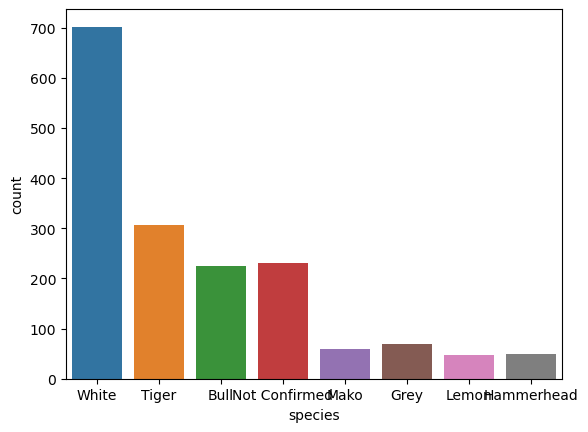

In [ ]:
sns.countplot(x='species', data=species_shark_data)

<Axes: xlabel='injury', ylabel='count'>

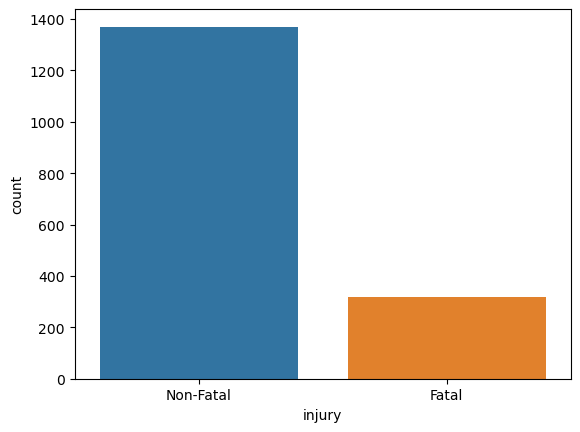

In [ ]:
sns.countplot(x='injury', data=species_shark_data)